# Overall metrics+visualization

# Intersectional-TabfairGAN+Adult

In [1]:
#correct for overall-final
import pandas as pd
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Set the working directory to the folder where the notebook is running
workingdir = os.getcwd()

# Set the log file path based on the working directory
file_path = os.path.join(workingdir, 'logs.log')


with open(file_path, 'r') as file:
    file_contents = file.readlines()

# Initialize lists to store results
results = []
subgroup_results = []

# Initialize variables to track the current lambda and train_idx
current_lambda = None
current_train_idx = None

# Helper function to parse subgroup lines
def parse_subgroup_line(line):
    pattern = re.compile(r"Subgroup \((Original|Generated)\): ([^,]+), DP: ([^,]+), Accuracy Difference: ([^,]+), F1 Difference: ([^,]+)")
    match = pattern.match(line)
    if match:
        return match.groups()
    return None

# Read the file line by line
for line in file_contents:
    line = line.strip()
    if not line:
        continue
    
    # Check if the line contains lambda and train_idx information
    if line[0].isdigit():
        values = line.split(', ')
        train_idx = int(values[0])
        accuracy_original = float(values[1])
        accuracy_generated = float(values[2])
        difference_accuracy = float(values[3])
        f1_original = float(values[4])
        f1_generated = float(values[5])
        difference_f1 = float(values[6])
        dp_original = float(values[7])
        dp_generated = float(values[8])
        dp_difference = dp_original - dp_generated

        # Update current lambda and train_idx
        if current_lambda is None or current_train_idx is None:
            current_lambda = 0.0
            current_train_idx = train_idx
        else:
            current_train_idx = train_idx if train_idx > current_train_idx else current_train_idx
            current_lambda += 0.05 if train_idx == 0 else 0

        results.append([current_lambda, difference_accuracy, difference_f1, dp_difference,dp_generated])
    else:
        subgroup_data = parse_subgroup_line(line)
        if subgroup_data:
            source, subgroup, dp, accuracy_diff, f1_diff = subgroup_data
            dp = float(dp)
            accuracy_diff = float(accuracy_diff)
            f1_diff = float(f1_diff)
            subgroup_results.append([current_lambda, source, subgroup, dp, accuracy_diff, f1_diff])

# Convert results to DataFrame
df_results_tab_adult = pd.DataFrame(results, columns=['lambda', 'difference_accuracy', 'difference_f1', 'dp_difference','dp_generated'])

# Aggregate overall results
df_aggregated_tab_adult = df_results_tab_adult.groupby('lambda').mean().reset_index()



In [2]:
df_results_tab_adult

,lambda,difference_accuracy,difference_f1,dp_difference,dp_generated
0,0.0,0.055279,0.128602,-0.022939,0.174345
1,0.0,0.074848,0.106878,-0.011594,0.163000
2,0.0,0.055611,0.120775,-0.017836,0.169242
3,0.0,0.064124,0.154039,-0.038271,0.189677
4,0.0,0.074406,0.109736,-0.038518,0.189924
...,...,...,...,...,...
405,2.0,0.060365,0.116977,0.141950,0.009456
406,2.0,0.067219,0.130839,0.153080,-0.001674
407,2.0,0.065672,0.136753,0.147092,0.004314
408,2.0,0.061249,0.100993,0.142254,0.009152


In [3]:
df_aggregated_tab_adult

,lambda,difference_accuracy,difference_f1,dp_difference,dp_generated
0,0.00,0.070636,0.117269,-0.020914,0.172320
1,0.05,0.074273,0.110526,0.070681,0.080725
2,0.10,0.073212,0.113366,0.086781,0.064625
3,0.15,0.072637,0.119291,0.098521,0.052885
4,0.20,0.070802,0.113549,0.109668,0.041738
5,0.25,0.066843,0.113133,0.115582,0.035824
6,0.30,0.073654,0.133300,0.116198,0.035208
7,0.35,0.067430,0.115284,0.121078,0.030328
8,0.40,0.068314,0.112407,0.124153,0.027253
9,0.45,0.071233,0.107670,0.124754,0.026652


In [4]:

import numpy as np

filtered_results = df_results_tab_adult[np.isclose(df_results_tab_adult['lambda'],  0.0)]
print(filtered_results)




   lambda  difference_accuracy  difference_f1  dp_difference  dp_generated
0     0.0             0.055279       0.128602      -0.022939      0.174345
1     0.0             0.074848       0.106878      -0.011594      0.163000
2     0.0             0.055611       0.120775      -0.017836      0.169242
3     0.0             0.064124       0.154039      -0.038271      0.189677
4     0.0             0.074406       0.109736      -0.038518      0.189924
5     0.0             0.096075       0.140733      -0.031042      0.182448
6     0.0             0.069099       0.096708      -0.001661      0.153067
7     0.0             0.058154       0.104573       0.002715      0.148691
8     0.0             0.096075       0.117369      -0.029503      0.180909
9     0.0             0.062687       0.093282      -0.020493      0.171899


In [5]:
df_results_tab_adult

,lambda,difference_accuracy,difference_f1,dp_difference,dp_generated
0,0.0,0.055279,0.128602,-0.022939,0.174345
1,0.0,0.074848,0.106878,-0.011594,0.163000
2,0.0,0.055611,0.120775,-0.017836,0.169242
3,0.0,0.064124,0.154039,-0.038271,0.189677
4,0.0,0.074406,0.109736,-0.038518,0.189924
...,...,...,...,...,...
405,2.0,0.060365,0.116977,0.141950,0.009456
406,2.0,0.067219,0.130839,0.153080,-0.001674
407,2.0,0.065672,0.136753,0.147092,0.004314
408,2.0,0.061249,0.100993,0.142254,0.009152


In [7]:
tolerance = 1e-5 
df_results_tab_adult[np.isclose(df_results_tab_adult['lambda'], 1.75, atol=tolerance)]

,lambda,difference_accuracy,difference_f1,dp_difference,dp_generated
350,1.75,0.075401,0.149032,0.143032,0.008374
351,1.75,0.049198,0.097204,0.155878,-0.004472
352,1.75,0.061913,0.114798,0.138775,0.012631
353,1.75,0.068214,0.137213,0.159093,-0.007687
354,1.75,0.074737,0.144699,0.147330,0.004076
355,1.75,0.068988,0.100715,0.129874,0.021532
356,1.75,0.074295,0.115128,0.145141,0.006265
357,1.75,0.059149,0.140276,0.136367,0.015039
358,1.75,0.057159,0.147680,0.150660,0.000746
359,1.75,0.072416,0.106769,0.151070,0.000336


In [8]:

# Initialize lists to store results
results = []

# Initialize variables to track the current lambda and train_idx
current_lambda = None
current_train_idx = None

# Read the file line by line
with open(file_path, 'r') as file:
    file_contents = file.readlines()

# Helper function to parse result lines
def parse_result_line(line):
    values = line.split(', ')
    train_idx = int(values[0])
    accuracy_original = float(values[1])
    accuracy_generated = float(values[2])
    difference_accuracy = float(values[3])
    f1_original = float(values[4])
    f1_generated = float(values[5])
    difference_f1 = float(values[6])
    dp_original = float(values[7])
    dp_generated = float(values[8])
    dp_difference = dp_original - dp_generated
    return [accuracy_generated, difference_accuracy, f1_generated, difference_f1, dp_difference, dp_generated]

# Process the file
for line in file_contents:
    line = line.strip()
    if not line:
        continue
    
    # Check if the line contains lambda and train_idx information
    if line[0].isdigit():
        if current_lambda is None:
            current_lambda = 0.0
        else:
            current_train_idx = int(line.split(', ')[0])
            if current_train_idx == 0:
                current_lambda += 0.05
        results.append([current_lambda] + parse_result_line(line))

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=['lambda', 'accuracy_generated', 'difference_accuracy', 'f1_generated', 'difference_f1', 'dp_difference', 'dp_generated'])

# Aggregate overall results
df_aggregated = df_results.groupby('lambda').agg(['mean', 'std']).reset_index()

# Flatten the column MultiIndex
df_aggregated.columns = ['_'.join(col).strip() for col in df_aggregated.columns.values]

# Display the aggregated DataFrame with mean and standard deviation
print(df_aggregated)

# Save the aggregated DataFrame to a CSV file
df_aggregated.to_csv('aggregated_results_with_std_tab_adult.csv', index=False)



    lambda_  accuracy_generated_mean  accuracy_generated_std  \
0      0.00                 0.770890                0.014065   
1      0.05                 0.780309                0.009117   
2      0.10                 0.777247                0.009371   
3      0.15                 0.771067                0.011305   
4      0.20                 0.775755                0.010414   
5      0.25                 0.770481                0.006028   
6      0.30                 0.771277                0.015229   
7      0.35                 0.770569                0.008960   
8      0.40                 0.766855                0.008886   
9      0.45                 0.773256                0.007124   
10     0.50                 0.773256                0.008453   
11     0.55                 0.767264                0.008619   
12     0.60                 0.765019                0.006646   
13     0.65                 0.772559                0.009668   
14     0.70                 0.771343    

In [9]:
df_aggregated

,lambda_,accuracy_generated_mean,accuracy_generated_std,difference_accuracy_mean,difference_accuracy_std,f1_generated_mean,f1_generated_std,difference_f1_mean,difference_f1_std,dp_difference_mean,dp_difference_std,dp_generated_mean,dp_generated_std
0,0.00,0.770890,0.014065,0.068579,0.014255,0.554681,0.012541,0.106589,0.012384,-0.012901,0.020549,0.164307,0.020549
1,0.05,0.780309,0.009117,0.058850,0.009123,0.557021,0.021977,0.103548,0.021835,0.058495,0.016361,0.092911,0.016361
2,0.10,0.777247,0.009371,0.062178,0.009538,0.563849,0.012330,0.097408,0.011968,0.075889,0.014643,0.075517,0.014643
3,0.15,0.771067,0.011305,0.068071,0.011046,0.563573,0.013785,0.096869,0.012893,0.092881,0.006881,0.058525,0.006881
4,0.20,0.775755,0.010414,0.063062,0.009981,0.564456,0.013453,0.095459,0.012854,0.103756,0.009132,0.047650,0.009132
5,0.25,0.770481,0.006028,0.068237,0.006065,0.557587,0.018539,0.101936,0.018445,0.106523,0.005652,0.044883,0.005652
6,0.30,0.771277,0.015229,0.067850,0.015510,0.544927,0.020648,0.115438,0.020634,0.112331,0.006416,0.039075,0.006416
7,0.35,0.770569,0.008960,0.068789,0.008837,0.553208,0.014012,0.107922,0.013838,0.114759,0.005307,0.036647,0.005307
8,0.40,0.766855,0.008886,0.072150,0.009463,0.556785,0.024037,0.103411,0.024348,0.120413,0.006297,0.030993,0.006297
9,0.45,0.773256,0.007124,0.066114,0.006932,0.553799,0.015429,0.107221,0.015067,0.120342,0.006480,0.031064,0.006480


# Optimized lambda-top three points

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the log file
log_file_path = 'results_sub_final_one_adult_new.log'
with open(log_file_path, 'r') as file:
    log_data = file.readlines()

# Function to parse the log data
def parse_log_data(log_data):
    data = []
    pattern = re.compile(r'^[0-9]')

    for line in log_data:
        if pattern.match(line.strip()):
            values = re.findall(r'[\d\.\-e]+', line.replace(',', '.'))
            # Clean up trailing dots
            values = [v.rstrip('.') for v in values]
            values = list(map(float, values))
            data.append(values)

    return data

# Parse the log data
parsed_data = parse_log_data(log_data)

# Convert the parsed data to a DataFrame
columns = [
    'train_idx', 'accuracy_original', 'accuracy_generated', 'difference_accuracy', 
    'f1_original', 'f1_generated', 'difference_f1', 'dp_original', 'dp_generated'
]
all_metrics_df = pd.DataFrame(parsed_data, columns=columns)

# Aggregate every 9 rows to represent one lambda value
lambda_value = 0.0
lambda_increment = 0.05
aggregated_data = []

for i in range(0, len(all_metrics_df), 9):
    subset_df = all_metrics_df.iloc[i:i+9]
    avg_dp_generated = subset_df['dp_generated'].mean()
    avg_f1_generated = subset_df['f1_generated'].mean()
    avg_accuracy_generated = subset_df['accuracy_generated'].mean()
    avg_difference_f1 = subset_df['difference_f1'].mean()
    avg_difference_accuracy = subset_df['difference_accuracy'].mean()
    avg_difference_dp = (subset_df['dp_original'] - subset_df['dp_generated']).mean()

    std_dp_generated = subset_df['dp_generated'].std()
    std_f1_generated = subset_df['f1_generated'].std()
    std_accuracy_generated = subset_df['accuracy_generated'].std()
    std_difference_f1 = subset_df['difference_f1'].std()
    std_difference_accuracy = subset_df['difference_accuracy'].std()

    aggregated_data.append({
        'lambda': lambda_value,
        'avg_dp_generated': avg_dp_generated,
        'avg_f1_generated': avg_f1_generated,
        'avg_accuracy_generated': avg_accuracy_generated,
        'avg_difference_f1': avg_difference_f1,
        'avg_difference_accuracy': avg_difference_accuracy,
        'avg_difference_dp': avg_difference_dp,
        'std_dp_generated': std_dp_generated,
        'std_f1_generated': std_f1_generated,
        'std_accuracy_generated': std_accuracy_generated,
        'std_difference_f1': std_difference_f1,
        'std_difference_accuracy': std_difference_accuracy
    })

    lambda_value += lambda_increment

# Convert the aggregated data to a DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Filter the lambda values between 0.05 and 2
filtered_df = aggregated_df[(aggregated_df['lambda'] >= 0) & (aggregated_df['lambda'] <= 2)]

# Calculate the absolute value of DP difference
filtered_df['abs_difference_dp'] = filtered_df['avg_difference_dp'].abs()

# Sort the DataFrame by abs_difference_dp in descending order
sorted_df = filtered_df.sort_values(by='abs_difference_dp', ascending=False)

# Find the top 3 points that have the highest abs_difference_dp, lowest avg_difference_f1, and lowest avg_difference_accuracy
top_3_points = sorted_df.head(3)

print("\nTop 3 Points with Highest Absolute DP Difference, Lowest F1 Difference, and Lowest Accuracy Difference:")
print(top_3_points)



Top 3 Points with Highest Absolute DP Difference, Lowest F1 Difference, and Lowest Accuracy Difference:
    lambda  avg_dp_generated  avg_f1_generated  avg_accuracy_generated  \
35    1.75          0.008803          0.528852                0.762029   
36    1.80          0.009734          0.547313                0.767594   
29    1.45          0.010125          0.549414                0.769486   

    avg_difference_f1  avg_difference_accuracy  avg_difference_dp  \
35           0.132301                 0.077391           0.142603   
36           0.112751                 0.071322           0.141672   
29           0.111535                 0.069738           0.141281   

    std_dp_generated  std_f1_generated  std_accuracy_generated  \
35          0.005195          0.031981                0.012030   
36          0.004329          0.015936                0.008793   
29          0.002221          0.017375                0.009726   

    std_difference_f1  std_difference_accuracy  abs_diff

C:\Users\tahde54\AppData\Local\Temp\ipykernel_20968\1174242066.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['abs_difference_dp'] = filtered_df['avg_difference_dp'].abs()


C:\Users\tahde54\AppData\Local\Temp\ipykernel_20968\1424754203.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['abs_difference_dp'] = filtered_df['avg_difference_dp'].abs()


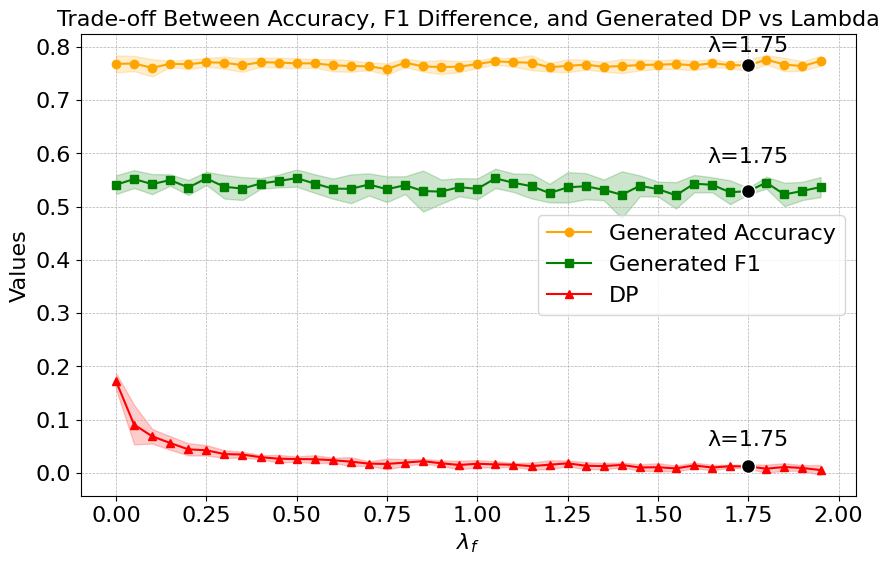

In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Read the log file
log_file_path = 'results_sub_final_one_adult_new_2.log'
with open(log_file_path, 'r') as file:
    log_data = file.readlines()

# Function to parse the log data
def parse_log_data(log_data):
    data = []
    pattern = re.compile(r'^[0-9]')

    for line in log_data:
        if pattern.match(line.strip()):
            values = re.findall(r'[\d\.\-e]+', line.replace(',', '.'))
            # Clean up trailing dots
            values = [v.rstrip('.') for v in values]
            values = list(map(float, values))
            data.append(values)

    return data

# Parse the log data
parsed_data = parse_log_data(log_data)

# Convert the parsed data to a DataFrame
columns = [
    'train_idx', 'accuracy_original', 'accuracy_generated', 'difference_accuracy', 
    'f1_original', 'f1_generated', 'difference_f1', 'dp_original', 'dp_generated'
]
all_metrics_df = pd.DataFrame(parsed_data, columns=columns)

# Aggregate every 9 rows to represent one lambda value
lambda_value = 0.0
lambda_increment = 0.05
aggregated_data = []

for i in range(0, len(all_metrics_df), 9):
    subset_df = all_metrics_df.iloc[i:i+9]
    avg_dp_generated = subset_df['dp_generated'].mean()
    avg_f1_generated = subset_df['f1_generated'].mean()
    avg_accuracy_generated = subset_df['accuracy_generated'].mean()
    avg_difference_f1 = subset_df['difference_f1'].mean()
    avg_difference_accuracy = subset_df['difference_accuracy'].mean()
    avg_difference_dp = (subset_df['dp_original'] - subset_df['dp_generated']).mean()

    std_dp_generated = subset_df['dp_generated'].std()
    std_f1_generated = subset_df['f1_generated'].std()
    std_accuracy_generated = subset_df['accuracy_generated'].std()
    std_difference_f1 = subset_df['difference_f1'].std()
    std_difference_accuracy = subset_df['difference_accuracy'].std()

    aggregated_data.append({
        'lambda': lambda_value,
        'avg_dp_generated': avg_dp_generated,
        'avg_f1_generated': avg_f1_generated,
        'avg_accuracy_generated': avg_accuracy_generated,
        'avg_difference_f1': avg_difference_f1,
        'avg_difference_accuracy': avg_difference_accuracy,
        'avg_difference_dp': avg_difference_dp,
        'std_dp_generated': std_dp_generated,
        'std_f1_generated': std_f1_generated,
        'std_accuracy_generated': std_accuracy_generated,
        'std_difference_f1': std_difference_f1,
        'std_difference_accuracy': std_difference_accuracy
    })

    lambda_value += lambda_increment

# Convert the aggregated data to a DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Filter the lambda values between 0.05 and 2
filtered_df = aggregated_df[(aggregated_df['lambda'] >= 0) & (aggregated_df['lambda'] <= 2)]

# Calculate the absolute value of DP difference
filtered_df['abs_difference_dp'] = filtered_df['avg_difference_dp'].abs()

# Sort the DataFrame by abs_difference_dp in descending order
sorted_df = filtered_df.sort_values(by='abs_difference_dp', ascending=False)

# Find the specific point where lambda is approximately 1.75
lambda_value = 1.75
highlight_point = filtered_df[np.isclose(filtered_df['lambda'], lambda_value, atol=1e-5)]

# Check if the highlight point is found
if highlight_point.empty:
    raise ValueError(f"No data point found for lambda value approximately {lambda_value}")

highlight_point = highlight_point.iloc[0]

# Plotting the accuracy and F1 differences with generated DP as percentages
plt.figure(figsize=(10, 6))

# Plot accuracy generated
plt.plot(filtered_df['lambda'], filtered_df['avg_accuracy_generated'], label='Generated Accuracy', color='orange', marker='o')
plt.fill_between(filtered_df['lambda'], 
                 filtered_df['avg_accuracy_generated'] - filtered_df['std_accuracy_generated'], 
                 filtered_df['avg_accuracy_generated'] + filtered_df['std_accuracy_generated'], 
                 color='orange', alpha=0.2)

# Plot F1 generated
plt.plot(filtered_df['lambda'], filtered_df['avg_f1_generated'], label='Generated F1', color='green', marker='s')
plt.fill_between(filtered_df['lambda'], 
                 filtered_df['avg_f1_generated'] - filtered_df['std_f1_generated'], 
                 filtered_df['avg_f1_generated'] + filtered_df['std_f1_generated'], 
                 color='green', alpha=0.2)

# Plot DP generated
plt.plot(filtered_df['lambda'], filtered_df['avg_dp_generated'], label='DP', color='red', marker='^')
plt.fill_between(filtered_df['lambda'], 
                 filtered_df['avg_dp_generated'] - filtered_df['std_dp_generated'], 
                 filtered_df['avg_dp_generated'] + filtered_df['std_dp_generated'], 
                 color='red', alpha=0.2)

# Highlight the specific point
plt.scatter(highlight_point['lambda'], highlight_point['avg_accuracy_generated'], color='black', s=100, edgecolor='white', zorder=5)
plt.scatter(highlight_point['lambda'], highlight_point['avg_f1_generated'], color='black', s=100, edgecolor='white', zorder=5)
plt.scatter(highlight_point['lambda'], highlight_point['avg_dp_generated'], color='black', s=100, edgecolor='white', zorder=5)

# Annotate the specific point
plt.annotate(f"λ={highlight_point['lambda']:.2f}", (highlight_point['lambda'], highlight_point['avg_accuracy_generated']),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)
plt.annotate(f"λ={highlight_point['lambda']:.2f}", (highlight_point['lambda'], highlight_point['avg_f1_generated']),
             textcoords="offset points", xytext=(0,20), ha='center', fontsize=16)
plt.annotate(f"λ={highlight_point['lambda']:.2f}", (highlight_point['lambda'], highlight_point['avg_dp_generated']),
             textcoords="offset points", xytext=(0,15), ha='center', fontsize=16)

plt.xlabel(r'$\lambda_f$', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.title('Trade-off Between Accuracy, F1 Difference, and Generated DP vs Lambda', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save the plot as a high-resolution image
plt.savefig('Tradeoff_Accuracy_F1_DP_vs_Lambda.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Sub-groups+Visualization

In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

# Read the log file with 'latin1' encoding and clean invalid characters
log_file_path = 'results_sub_final_one_adult_new_2.log'
with open(log_file_path, 'r', encoding='latin1') as file:
    log_data = file.readlines()

# Clean invalid characters in the log data
cleaned_log_data = [re.sub(r'[^\x00-\x7F]+', '', line) for line in log_data]

# Function to parse the log data
def parse_log_data(log_data):
    subgroup_data = []
    subgroup_pattern = re.compile(r'^Subgroup \(.*\):')

    for line in log_data:
        if subgroup_pattern.match(line.strip()):
            for metric in ['DP', 'Accuracy', 'F1 Score']:
                match = re.search(fr'Subgroup \((Original|Generated)\): (.*), {metric}: ([\d\.\-e]+)', line.strip())
                if match:
                    source = match.group(1)
                    subgroup = match.group(2).split(',')[0].strip()  # Correctly extract the subgroup name
                    metric_type = metric
                    value = float(match.group(3))
                    subgroup_data.append([source, subgroup, metric_type, value])

    return subgroup_data

# Parse the log data
subgroup_data_tab_adult = parse_log_data(cleaned_log_data)

# Convert the parsed data to a DataFrame
subgroup_columns = ['source', 'subgroup', 'metric_type', 'value']
subgroup_metrics_df_tab_adult = pd.DataFrame(subgroup_data_tab_adult, columns=subgroup_columns)

# Add new lambda column
lambda_values = []
current_lambda = 0.0
lambda_increment = 0.05
rows_per_lambda = 300

for i in range(len(subgroup_metrics_df_tab_adult)):
    lambda_values.append(current_lambda)
    if (i + 1) % rows_per_lambda == 0:
        current_lambda += lambda_increment

subgroup_metrics_df_tab_adult['lambda'] = lambda_values

subgroup_metrics_df_tab_adult = subgroup_metrics_df_tab_adult[subgroup_metrics_df_tab_adult['lambda'] <= 2.0]


In [13]:
subgroup_metrics_df_tab_adult[np.isclose(subgroup_metrics_df_tab_adult['lambda'], 1.75, atol=tolerance)]


,source,subgroup,metric_type,value,lambda
10500,Original,Female_2560,Accuracy,0.802440,1.75
10501,Original,Female_2560,F1 Score,0.462324,1.75
10502,Original,Female_<25,Accuracy,0.956325,1.75
10503,Original,Female_<25,F1 Score,0.064516,1.75
10504,Original,Female_>60,Accuracy,0.856410,1.75
...,...,...,...,...,...
10795,Generated,Male_2560,F1 Score,0.572556,1.75
10796,Generated,Male_<25,Accuracy,0.941032,1.75
10797,Generated,Male_<25,F1 Score,0.076923,1.75
10798,Generated,Male_>60,Accuracy,0.698413,1.75


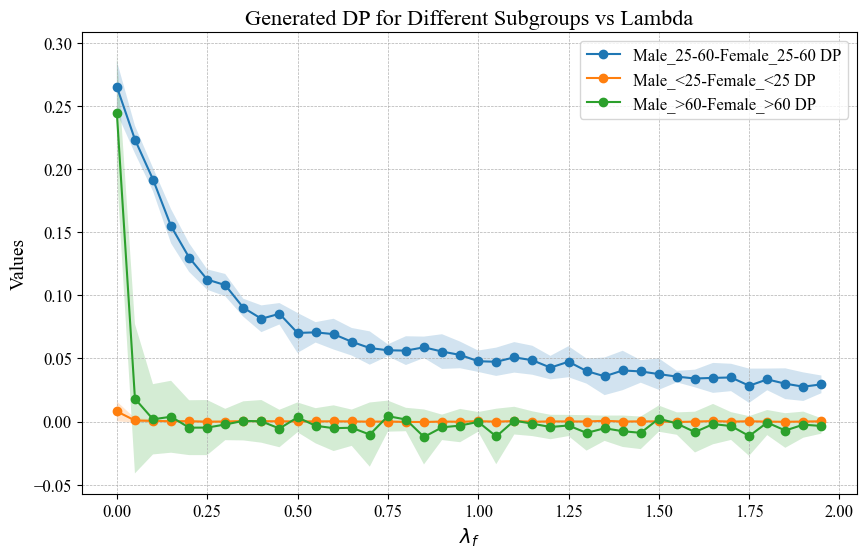

In [15]:
import pandas as pd
import re
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

# Read the log file with 'latin1' encoding and clean invalid characters
log_file_path = 'results_sub_final_one_adult_new_2.log'
with open(log_file_path, 'r', encoding='latin1') as file:
    log_data = file.readlines()

# Clean invalid characters in the log data
cleaned_log_data = [re.sub(r'[^\x00-\x7F]+', '', line) for line in log_data]

# Function to parse the log data
def parse_log_data(log_data):
    subgroup_data = []
    subgroup_pattern = re.compile(r'^Subgroup \(.*\):')

    for line in log_data:
        if subgroup_pattern.match(line.strip()):
            for metric in ['DP', 'Accuracy', 'F1 Score']:
                match = re.search(fr'Subgroup \((Original|Generated)\): (.*), {metric}: ([\d\.\-e]+)', line.strip())
                if match:
                    source = match.group(1)
                    subgroup = match.group(2).split(',')[0].strip().replace('2560', '25-60')  # Correctly extract and format the subgroup name
                    metric_type = metric
                    value = float(match.group(3))
                    subgroup_data.append([source, subgroup, metric_type, value])

    return subgroup_data

# Parse the log data
subgroup_data_tab_adult = parse_log_data(cleaned_log_data)

# Convert the parsed data to a DataFrame
subgroup_columns = ['source', 'subgroup', 'metric_type', 'value']
subgroup_metrics_df_tab_adult = pd.DataFrame(subgroup_data_tab_adult, columns=subgroup_columns)

# Add new lambda column
lambda_values = []
current_lambda = 0.0
lambda_increment = 0.05
rows_per_lambda = 300

for i in range(len(subgroup_metrics_df_tab_adult)):
    lambda_values.append(current_lambda)
    if (i + 1) % rows_per_lambda == 0:
        current_lambda += lambda_increment

subgroup_metrics_df_tab_adult['lambda'] = lambda_values

subgroup_metrics_df_tab_adult = subgroup_metrics_df_tab_adult[subgroup_metrics_df_tab_adult['lambda'] <= 2.0]

# Define subgroups
dp_subgroups = ['Male_25-60-Female_25-60', 'Male_<25-Female_<25', 'Male_>60-Female_>60']
accuracy_f1_subgroups = ['Female_25-60', 'Female_<25', 'Female_>60', 'Male_25-60', 'Male_<25', 'Male_>60']

# DP Aggregation for the specified subgroups
dp_aggregated_tab_adult = subgroup_metrics_df_tab_adult[(subgroup_metrics_df_tab_adult['subgroup'].isin(dp_subgroups)) &
                                    (subgroup_metrics_df_tab_adult['metric_type'] == 'DP') &
                                    (subgroup_metrics_df_tab_adult['source'] == 'Generated')].groupby(['lambda', 'subgroup']).agg({'value': ['mean', 'std']}).reset_index()
dp_aggregated_tab_adult.columns = ['lambda', 'subgroup', 'avg_dp', 'std_dp']

# Plotting DP for the three subgroups
plt.figure(figsize=(10, 6))
for subgroup in dp_subgroups:
    subgroup_data_tab_adult = dp_aggregated_tab_adult[dp_aggregated_tab_adult['subgroup'] == subgroup]
    plt.plot(subgroup_data_tab_adult['lambda'], subgroup_data_tab_adult['avg_dp'], label=f'{subgroup} DP', marker='o')
    plt.fill_between(subgroup_data_tab_adult['lambda'], 
                     subgroup_data_tab_adult['avg_dp'] - subgroup_data_tab_adult['std_dp'], 
                     subgroup_data_tab_adult['avg_dp'] + subgroup_data_tab_adult['std_dp'], 
                     alpha=0.2)

plt.xlabel(r'$\lambda_f$', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Generated DP for Different Subgroups vs Lambda', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot as a high-resolution image
plt.savefig('DP_vs_Lambda.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
